# List Comprehension에 대하여
#### 2021년 2학기 데이터사이언스 개론 첫번째 과제, 2019113421 최은진, 2021.09 작성


## 0.Index
### 1. 단어 해석에 대하여
### 2. list comprehension의 기본
    2.1 기본 문법
    2.2 동작 순서
    2.3 for loop과의 속도 비교
### 3. list comprehension의 응용
    3.1 if 조건문, 동작 순서, for loop과의 속도 비교
    3.2 for 2개, 동작 순서, for loop 과의 속도 비교
### 4. list comprehension, for loop 수행 속도 비교 정리
### 5. Friend of Friend 수행 속도가 차이 나는 이유
### 6. 결론
### 7. 참고 자료 출처


## 1. 단어 해석에 대하여

list comprehension은 쉽게 말해 리스트를 쉽게, 짧게 한 줄로 만들 수 있는 파이썬의 문법이다.
그렇다면 list comprehension을 한글로 어떻게 해석하는게 좋을까? 

영어 단어를 단순히 한글로 옮기자면 list는 '목록'이고 comprehension은 '이해력'이라는 뜻이다. 파이썬의 list는 java의 배열과 비슷한 선형 자료구조로써 '목록'이라는 해석이 적합해 보이지만 comprehension은 이해력이라고 번역하기에는 무리가 있다. 다른 뜻을 찾아보자.  
comprehension은 형용사 comprehensive의 명사형이기도 하다. comprehensive은 '포괄적인, 종합적인'의 뜻을 가지고 있는데 이 뜻을 차용하면 list comprehension을 이해하기 편해진다. list comprehension은 이 글에서 단어 그대로 사용할 예정이지만  **'목록 포괄식'**, 또는 **'목록 종합식'** 이라고 소개하고 싶다.

## 2. list comprehension의 기본 문법
### 2.1 기본 문법

먼저 list comprehension을 사용하기 전, 기본 list의 사용 방법 예시이다.
파이썬에서 리스트를 사용하려면, 배열을 선언하고 안에 들어갈 원소를 할당하면 된다. 추가를 위해서는 .append()를 이용한다.

In [1]:
lista = ['a1','a2','a3']
lista.append('a4')
print(lista)

['a1', 'a2', 'a3', 'a4']


이미 다른 자료의 형태로 저장되어 있다면 간단히 자료형 변환을 통해 원소를 가지고 있는 리스트를 생성하는 것도 가능하다.  
하지만 원소를 1000개를 넣어야 한다면? 모든 원소가 불규칙적이며 중요한 정보를 담고 있다면 수작업을 해야하지만 규칙이 있는 원소들은 반복문을 통해 쉽게 해결 가능하다. 결과를 한 눈에 보기 위해 우선 예시는 원소 10개만 할당해주었다.

In [2]:
listb = []
for i in range(10):
    listb.append(i)
print(listb)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


이 반복문을 사용할 때, 주의할 점은 반복문 안에서 바로 listb.append()를 사용하지 못한다는 것이다. 반드시 listb를 사용하기에 앞서 자료형이 list이며 이름은 listb라고 부를 것이라고 명시해야 한다. 만약 listb = []라고 빈 리스트라도 선언하지 않는다면 NameError: name 'listb' is not defined라는 에러를 만나게 될 것이다. 결국 listb의 선언, for문, for문 안에 수행할 내용 이렇게 최소 3줄을 써야되는 것이다.

list comprehension은 선언,반복문,수행내용의 3줄을 쉽고 짧게 한 줄로 만들어 깔끔하고 우아한 코드로 만들어 준다. 기본적인 문법은 다음과 같다.

**[(변수로 활용한 값) for (사용할 변수 이름) in (순회 할 값)]**


In [3]:
listc = [i for i in range(10)]
print(listc)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


변수로 활용한 값은 다양한 방식으로 넣을 수 있으며 in 뒤에는 순회할 모든 형태가 가능하기 때문에 다양하게 사용 가능하다.  

In [4]:
origin=['a','b','c','d','e']
new = [i*2 for i in origin]
print(new)

['aa', 'bb', 'cc', 'dd', 'ee']


### 2.2 list comprehension의 동작 순서
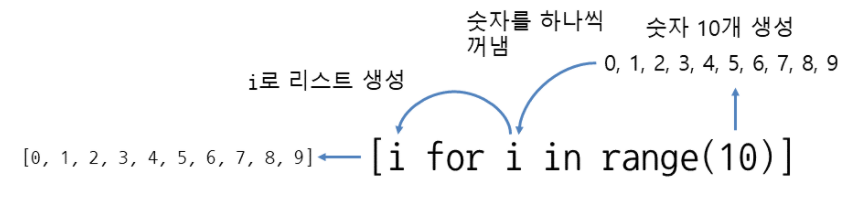

### 2.3 list comprehension과 for loop의 속도 비교
이토록 간단해진 list comprehension은 단순히 코드를 줄여주는 것에 끝나지 않고 실제 수행 속도도 빠르다. ***바이트 코드로 구현했기 때문에 원소를 추가할 때 한 반복의 수행마다 함수로 호출하지 않아도 되기 때문이다. 함수의 프레임을 중단하거나 재개하면 속도가 느려지는데, list comprehension 방식은 함수의 호출 방식이 최적화가 되어 일반 for loop에 비해 더 빠르다고 볼 수 있다.*** 같은 리스트를 두가지 방법으로 만들고 수행 속도를 비교해보았다.

In [5]:
from pytictoc import TicToc
t = TicToc()
print("list comprehension의 속도")
t.tic()
list1 = [i for i in range(1000000)]
t.toc()

print("for문과 list append 속도")
t.tic()
list2 = []
for i in range(1000000):
    list2.append(i)
t.toc()

list comprehension의 속도
Elapsed time is 0.084418 seconds.
for문과 list append 속도
Elapsed time is 0.143204 seconds.


실행 환경 차이가 있겠지만 현재 실험 환경에서는 list comprehension을 사용한 list1의 생성과 할당에는 0.091418 seconds가 소요되었고 for문 방식을 이용한 list2는 0.179304 seconds가 측정되었다. 시간이 약 2배 차이난다.

하지만 list comprehension이 for loop 보다 현저히 빠른 경우는 list에 원소를 추가하는 동작의 경우에만 그러하다. 만약 list를 생성하며 원소를 추가하는 단계를 생략하고 단순 계산만 하는 경우에는 for loop이 빠르다.

In [6]:
from pytictoc import TicToc
t = TicToc()
iterations = 1000000
print("list comprehension 계산")
t.tic()
[i+1 for i in range(iterations)]
t.toc()
print("for문 계산")
t.tic()
for i in range(iterations):
    i+1
t.toc()

list comprehension 계산
Elapsed time is 0.126252 seconds.
for문 계산
Elapsed time is 0.098344 seconds.


현재 실험 중인 환경에서는 list comprehension 의 경우에 0.126496 seconds가 소요되었고 두번째 comprehension 방식에는 0.102868 seconds가 소요되었다. list에 원소를 할당하지 않는 단순 반복 계산일 경우에는 list comprehension이 10% 정도 더 느리다.

## 3. list comprehension의 응용
### 3.1 if 조건문, 동작 순서, for loop과의 속도 비교
list comprehension에 if 조건문을 써서 특정 값을 필터링 할 수도 있다. 기본 문법에서 if문을 추가하면 된다.

In [7]:
a = [i for i in range(10) if i%2 == 0]
print(a)

[0, 2, 4, 6, 8]


if 조건에 참인 값만 a리스트에 들어가도록 한다. 동작 순서는 다음과 같다.
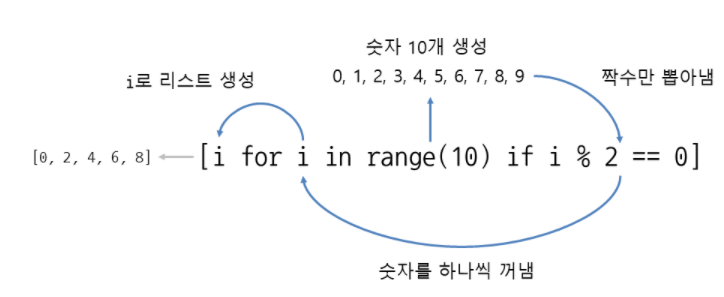

for문과 if문 조합과 비교해보면 더 간단하다. 그렇다면 수행 속도 시간 차이는 어떨까?

In [8]:
from pytictoc import TicToc
t = TicToc()

print("list comprehension if문 방식")
t.tic()
a = [i for i in range(1000000) if i%2 == 0]
t.toc()

print("일반 for + if 방식")
t.tic()
b = []
for i in range(1000000):
    if i%2 == 0:
        b.append(i)
t.toc()

list comprehension if문 방식
Elapsed time is 0.114938 seconds.
일반 for + if 방식
Elapsed time is 0.184578 seconds.


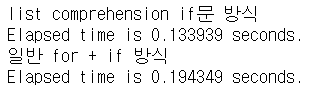
list comprehension은 리스트 선언, for문, if문, 수행 동작의 4줄을 1줄로 줄여준다는 점에서 효율성이 더 좋아졌지만 2배가 차이 났던 단순 순회인 경우보다 수행 속도의 차이가 줄었다.

### 3.2 for 2개, 동작 순서, for loop 과의 속도 비교
이번에는 list comprehension 안에 for가 여러 개일 때 동작 순서와 다중for문과 속도 비교를 해보자. list comprehension 안에 for 의 순서와 일반 for문의 순서는 동일하다고 기억하면 편하다.

In [9]:
from pytictoc import TicToc
t = TicToc()
a = [i * j for j in range(2, 10) for i in range(1, 10)] 

# 이 경우 사실 가독성이 더 좋지 않다. 엔터로 줄을 분리하여도 된다.
print("list comprehension for 2개")
t.tic()
b = [i * j for j in range(2, 10)
           for i in range(1, 10)]
t.toc()

print("일반 for 2개")
t.tic()
c = []
for i in range(2,10):
    for j in range(1,10):
        c.append(i*j)
t.toc()

list comprehension for 2개
Elapsed time is 0.007395 seconds.
일반 for 2개
Elapsed time is 0.000207 seconds.


for문 2개의 list comprehension 수행 순서는 다음과 같다.
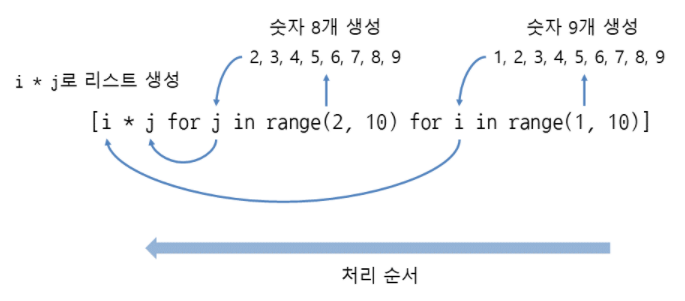

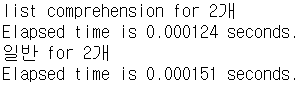
list comprehension 방식이 조금 더 빠르나 단일 for문 수행 때 보다 차이가 줄었다. 수행 속도의 편차가 커서 list comprehension이 빠를 때도, for문이 빠를 때도 있다.  
각 예제들을 살펴본 결과 단순한 계산 결과를 원소로 list에 할당할 때, list comprehension은 for loop보다 현저히 빠르다. 하지만 for문이 2개거나, if문의 추가 등을 통해 식의 변형이 있는 경우, 두 방식의 속도 차이가 작아지고 기복이 있는 것을 알 수 있었다. 하지만 이 실험은 거의 단일 시행이며 특정 조건 하에서 시행한 것이므로 일반화를 하기엔 아직 이르다.  

## 4. list comprehension, for loop 수행 속도 비교 정리
다음은 for문과 list comprehension를 통해 200부터 4000 미만 까지 200씩 점프하며 단순 계산인 x+2의 계산 결과를 list에 할당할 때 시간 차이를 그래프로 나타낸 것이다.

N =  4000
Mean(For-loop_run_time/ List_run_time =  0.6517126763587682


<function matplotlib.pyplot.show(close=None, block=None)>

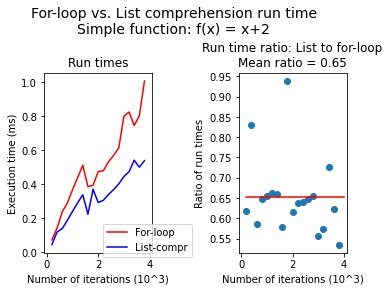

In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import timeit
def f1(x):
     return x +2
    
N = 4000
print("N = ", N)
DN = 200
x = range(DN, N, DN)
y1 = []
y2 = []
y3 = []
a = 1
nSamples = 0
meanRatio = 0

for i in range(DN, N, DN):
    t1 = timeit.default_timer()    
    add_two1 = []
    for k in range(0, i):
         add_two1.append(f1(k))
    t2 = timeit.default_timer()
        
    dt1 = 1000 * (t2 - t1)
    y1.append(dt1)
    
    t10 = timeit.default_timer()   
    
    add_two2 = []   
    multiples_of_two = [f1(k) for k in range(0, i)]
    t20 = timeit.default_timer()
        
    dt2 = 1000 * (t20 - t10)
    y2.append(dt2)
    
    y3.append(dt2/dt1)
    
    nSamples = nSamples + 1
    meanRatio = meanRatio + dt2/dt1

meanRatio = meanRatio/nSamples
print("Mean(For-loop_run_time/ List_run_time = ", meanRatio)


x1 = []
for j in x:
    x1.append(j/1000)

plt.subplot(121)
plt.plot(x1, y1, color='r', label= "For-loop")
plt.plot(x1, y2, color='b', label= "List-compr")
plt.title('Run times')
plt.xlabel("Number of iterations (10^3)")
plt.ylabel('Execution time (ms)')
plt.xlim([-0.1, N/1000 + 0.1])
plt.legend(loc = 'lower left', bbox_to_anchor=(0.5, -0.05))

plt.subplot(122)
plt.scatter(x1, y3) 
plt.plot([DN/1000, N/1000], [meanRatio, meanRatio], color='r')
title2 = "Run time ratio: List to for-loop\nMean ratio = " + '{:04.2f}'.format(meanRatio)
plt.title(title2)
plt.xlabel("Number of iterations (10^3)")
plt.ylabel('Ratio of run times')
plt.xlim([-0.1, N/1000 + 0.1])

plt.suptitle("For-loop vs. List comprehension run time\nSimple function: f(x) = x+2\n  ", fontsize=14)
plt.subplots_adjust(left=0.2, wspace=0.8, top=0.75)

plt.show

값을 기본 계산하여 list에 append를 하는 경우, 그 차이가 처음엔 많이 나지 않지만, 점점 차이가 커지며 대체로 list comprehension 방식을 사용하면 for loop보다 시간을 단축할 수 있다는 것을 확인할 수 있다. 하지만 다음과 같이 x의 제곱 + x의 세제곱 + x의 네 제곱과 같은 복잡한 계산을 수행하며 리스트를 생성할 때는 다른 결과가 나오는 것을 알 수 있다.

N =  4000
Mean(For-loop_run_time/ List_run_time =  0.9240495649980925


<function matplotlib.pyplot.show(close=None, block=None)>

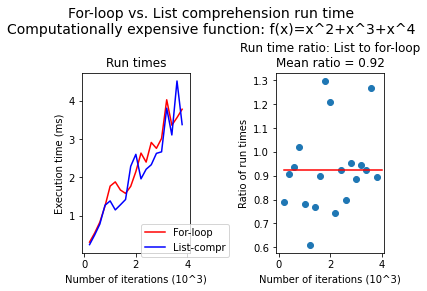

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import timeit

def f2(x):
    return (x**2 + x**3 + x**4)
    
N = 4000
print("N = ", N)
DN = 200
x = range(DN, N, DN)
y1 = []
y2 = []
y3 = []
a = 1
nSamples = 0
meanRatio = 0

for i in range(DN, N, DN):
    t1 = timeit.default_timer()    
    multiples_of_two = []
    for k in range(0, i):
         multiples_of_two.append(f2(k))
        
    t2 = timeit.default_timer()
        
    dt1 = 1000 * (t2 - t1)
    y1.append(dt1)
    
    t10 = timeit.default_timer()   
    
    multiples_of_two = []   
    multiples_of_two = [f2(k) for k in range(0, i)]
    
    t20 = timeit.default_timer()
        
    dt2 = 1000 * (t20 - t10)
    y2.append(dt2)
    
    y3.append(dt2/dt1)
    
    nSamples = nSamples + 1
    meanRatio = meanRatio + dt2/dt1

meanRatio = meanRatio/nSamples
print("Mean(For-loop_run_time/ List_run_time = ", meanRatio)

x1 = []
for j in x:
    x1.append(j/1000)

plt.subplot(121)
plt.plot(x1, y1, color='r', label= "For-loop")
plt.plot(x1, y2, color='b', label= "List-compr")
plt.title('Run times')
plt.xlabel("Number of iterations (10^3)")
plt.ylabel('Execution time (ms)')
plt.xlim([-0.1, N/1000 + 0.1])
plt.legend(loc = 'lower left', bbox_to_anchor=(0.5, -0.05))

plt.subplot(122)
plt.scatter(x1, y3) 
plt.plot([DN/1000, N/1000], [meanRatio, meanRatio], color='r')
title2 = "Run time ratio: List to for-loop\nMean ratio = " + '{:04.2f}'.format(meanRatio)
plt.title(title2)
plt.xlabel("Number of iterations (10^3)")
plt.ylabel('Ratio of run times')
plt.xlim([-0.1, N/1000 + 0.1])

plt.suptitle("For-loop vs. List comprehension run time\nComputationally expensive function: f(x)=x^2+x^3+x^4\n  ", fontsize=14)
plt.subplots_adjust(left=0.2, wspace=0.8, top=0.75)

plt.show

계산을 수행할 때 보다 약간씩 오차가 있지만 x+2와 같은 단순 계산보다 속도 차이가 훨씬 줄어 거의 차이가 없고, 가끔은 list comprehension을 수행할 때 시간이 더 많이 걸리는 경우도 있다는 것을 알 수 있다.  

## 5. Friend of Friend 수행 속도 비교
원래 과제의 주제였던 친구의 친구 추천 알고리즘의 속도 비교를 살펴보자.

In [12]:
import numpy as np
users = [
    { "id": 0, "name": "Hero" },
    { "id": 1, "name": "Dunn" },
    { "id": 2, "name": "Sue" },
    { "id": 3, "name": "Chi" },
    { "id": 4, "name": "Thor" },
    { "id": 5, "name": "Clive" },
    { "id": 6, "name": "Hicks" },
    { "id": 7, "name": "Devin" },
    { "id": 8, "name": "Kate" },
    { "id": 9, "name": "Klein" }
]
friendship_pairs = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),
                    (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]
f = {user["id"]: [] for user in users}
f
# Initialize the dict with an empty list for each user id:
friendships = {user["id"]: [] for user in users}

# And loop over the friendship pairs to populate it:
for i, j in friendship_pairs:
    friendships[i].append(j)  # Add j as a friend of user i
    friendships[j].append(i)  # Add i as a friend of user j
friendships
def number_of_friends(user):
    """How many friends does _user_ have?"""
    user_id = user["id"]
    friend_ids = friendships[user_id]
    return len(friend_ids)

total_connections = 0
for user in users:
    total_connections += number_of_friends(user)

num_users = len(users)
avg_connections = total_connections / num_users

print(f"사용자 총 수 = {num_users}")       # 10
print(f"평균 연결 수 = {avg_connections}") # 2.4    
def number_of_friends_v2(user):
    """How many friends does _user_ have?"""
    user_id = user["id"]
    friend_ids = friendships[user_id]
    return len(friend_ids)

total_connections = np.sum(np.fromiter((number_of_friends_v2(user)
                        for user in users), dtype=np.int32))

assert total_connections == 24

num_users = len(users)
avg_connections = total_connections / num_users

print(f"사용자 총 수 = {num_users}")       # 10
print(f"평균 연결 수 = {avg_connections}") # 2.4
# Create a list (user_id, number_of_friends).
num_friends_by_id = [(user["id"], number_of_friends(user))
                     for user in users]

print(num_friends_by_id)

num_friends_by_id.sort(                                # Sort the list
       key=lambda id_and_friends: id_and_friends[1],   # by num_friends
       reverse=True)                                   # largest to smallest

print(num_friends_by_id)
def foaf_ids_bad(user):
    """foaf is short for "friend of a friend" """
    return [foaf_id
            for friend_id in friendships[user["id"]]
            for foaf_id in friendships[friend_id]]

print(foaf_ids_bad(users[0]))  # [0, 2, 3, 0, 1, 3]

print(friendships[0])  # [1, 2]
print(friendships[1])  # [0, 2, 3]
print(friendships[2])  # [0, 1, 3]
def friends_of_friends_v1(user):
    user_id = user["id"]
    foaf_list = []
    for friend_id in friendships[user_id]:   # [1, 2, 4]
        for foaf_id in friendships[friend_id]: # [0, 2, 3, 0, 1, 3, 3, 5]
            if foaf_id != user_id and foaf_id not in friendships[user_id]:
                foaf_list.append(foaf_id)
    # print(foaf_list)
    foaf_dict = {}

    for id in foaf_list:
        if id in foaf_dict:
            foaf_dict[id] += 1
        else:
            foaf_dict[id] = 1

    return foaf_dict
print("★friends_of_friends Ver1(for loop 사용) 소요 시간")
%timeit friends_of_friends_v1(users[3])    # {0: 2, 5: 1}
from collections import Counter                   # not loaded by default

def friends_of_friends_v2(user):
    user_id = user["id"]
    return Counter(
        foaf_id
        for friend_id in friendships[user_id]     # For each of my friends,
        for foaf_id in friendships[friend_id]     # find their friends
        if foaf_id != user_id                     # who aren't me
        and foaf_id not in friendships[user_id]   # and aren't my friends.
    )
print("★friends_of_friends Ver2(list comprehension 사용) 소요 시간")
%timeit friends_of_friends_v2(users[3])    # {0: 2, 5: 1}

사용자 총 수 = 10
평균 연결 수 = 2.4
사용자 총 수 = 10
평균 연결 수 = 2.4
[(0, 2), (1, 3), (2, 3), (3, 3), (4, 2), (5, 3), (6, 2), (7, 2), (8, 3), (9, 1)]
[(1, 3), (2, 3), (3, 3), (5, 3), (8, 3), (0, 2), (4, 2), (6, 2), (7, 2), (9, 1)]
[0, 2, 3, 0, 1, 3]
[1, 2]
[0, 2, 3]
[0, 1, 3]
★friends_of_friends Ver1(for loop 사용) 소요 시간
2.26 µs ± 85 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
★friends_of_friends Ver2(list comprehension 사용) 소요 시간
3.53 µs ± 146 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


friends_of_friends의 for loop 방식이 list comprehension보다 훨씬 빠르다. 리스트를 생성할 때 두 번의 for문을 사용하고 and로 연결된 if문의 사용 때문에 기본 for반복문을 사용할 때 속도가 빠른 것일까?

***근본적으로 두 알고리즘은 return 자료형에 차이가 있다.***

for loop을 사용할 때는 파이썬의 내장 자료형인 dictionary만 사용하여 return했으나 list comprehension을 사용할 때는 기본 자료구조인 dictionary의 확장형인 collectins 모듈의 Couter 클래스를 사용하여 return 하고 있다.
dictionary를 사용할 때는 +=1 를 사용하여 직접 계산하는 과정을 추가했지만 Counter클래스는 데이터의 수를 자동으로 계산한 코드이다.
Counter 클래스는 짧은 반복문을 계산할 때 '병목현상'이 발생한다. 추상 메타클래스이기 때문에 약간 더 복잡하기 때문이다. 
Counter 클래스는 직접 dictionary를 이용하여 개수를 셀 때 보다 코드가 훨씬 줄어 개발자의 수고를 줄여주지만, 실제로 수행 속도는 조금 느리다고 볼 수 있다.  

서술한 dictionary와 Counter 클래스의 속도 차이를 증명하기 위해 4가지 경우를 모두 실험해보았다.
+ for loop+dictonary
+ for loop+Counter
+ list comprehension+dictionary
+ list comprehension+Counter 

In [13]:
from collections import Counter                   # not loaded by default
def friends_of_friends_for_dic(user):
    user_id = user["id"]
    foaf_list = []
    for friend_id in friendships[user_id]:   # [1, 2, 4]
        for foaf_id in friendships[friend_id]: # [0, 2, 3, 0, 1, 3, 3, 5]
            if foaf_id != user_id and foaf_id not in friendships[user_id]:
                foaf_list.append(foaf_id)
    # print(foaf_list)
    foaf_dict = {}

    for id in foaf_list:
        if id in foaf_dict:
            foaf_dict[id] += 1
        else:
            foaf_dict[id] = 1

    return foaf_dict
print("★friends_of_friends for loop + dictionary 소요 시간")
%timeit friends_of_friends_for_dic(users[3])    # {0: 2, 5: 1}

def friends_of_friends_for_counter(user):
    user_id = user["id"]
    foaf_list = []
    for friend_id in friendships[user_id]:   # [1, 2, 4]
        for foaf_id in friendships[friend_id]: # [0, 2, 3, 0, 1, 3, 3, 5]
            if foaf_id != user_id and foaf_id not in friendships[user_id]:
                foaf_list.append(foaf_id)

    return Counter(foaf_list)
print("★friends_of_friends for loop + Counter 소요 시간")
%timeit friends_of_friends_for_counter(users[3])    # {0: 2, 5: 1}

★friends_of_friends for loop + dictionary 소요 시간
2.45 µs ± 190 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
★friends_of_friends for loop + Counter 소요 시간
3.73 µs ± 158 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [14]:
def friends_of_friends_comp_dic(user):
    user_id = user["id"]
    foaf_list = [ foaf_id for friend_id in friendships[user_id]     # For each of my friends,
                  for foaf_id in friendships[friend_id]     # find their friends
                  if foaf_id != user_id                     # who aren't me
                  and foaf_id not in friendships[user_id]   # and aren't my friends.
                ]
    foaf_dict = {}

    for id in foaf_list:
        if id in foaf_dict:
            foaf_dict[id] += 1
        else:
            foaf_dict[id] = 1

    return foaf_dict
print("★friends_of_friends list comprehension + dictionary 소요 시간")
%timeit friends_of_friends_comp_dic(users[3])    # {0: 2, 5: 1}

def friends_of_friends_comp_counter(user):
    user_id = user["id"]
    return Counter(
        foaf_id
        for friend_id in friendships[user_id]     # For each of my friends,
        for foaf_id in friendships[friend_id]     # find their friends
        if foaf_id != user_id                     # who aren't me
        and foaf_id not in friendships[user_id]   # and aren't my friends.
    )
print("★friends_of_friends list comprehension + Counter 소요 시간")
%timeit friends_of_friends_comp_counter(users[3])    # {0: 2, 5: 1}

★friends_of_friends list comprehension + dictionary 소요 시간
2.36 µs ± 132 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
★friends_of_friends list comprehension + Counter 소요 시간
3.74 µs ± 308 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


현재 실험 환경의 결과는 다음과 같다.

+ for loop+dictonary 소요시간
2.32 µs ± 129 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
+ for loop+Counter
3.31 µs ± 210 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
+ list comprehension+dictionary
2.39 µs ± 181 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
+ list comprehension+Counter 
3.71 µs ± 89.5 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)

list comprehension과 for loop의 사용 여부에 관계없이, dictionary를 사용할 때 보다 Counter 클래스를 사용했을 때 확실히 시간이 오래 걸린 것을 알 수 있다.

## 6. 결론
list comprehension은 선형 자료 구조인 리스트 선언과 원소 할당을 한 줄에 가능하게 만들어 코드를 줄일 수 있고 함수 호출의 최적화를 통해 for loop을 사용할 때 보다 속도가 훨씬 빠르다. 보편적으로 많이 사용하는 간단한 리스트 할당의 경우 명백히 그러하지만, 모든 상황에서 일관적으로 효율이 좋은 문법은 아니다. for문이 여러 개이거나 조건이 있을 때, 복잡한 계산을 할 때 그리고 자료의 크기에 등에 따라 기복이 있다. 그러나 주어진 예제에서 list comprehension과 for loop 수행 속도의 현저한 차이는 기본 내장 dictionary와 collections모듈의 Counter 클래스의 사용 여부에서 기인한다.   

무심코 썼던 list와 list comprehension, for loop, 내장 dictionary와 Collections모듈의 Counter 클래스 등의 상세한 사용 방식과 속도 비교를 마쳤다. 다양하게 변형도 해보고, 증명하기 위한 많은 참고 자료를 본 후 예시도 직접 만드는 시간을 가지며 부족한 이론 지식을 채울 수 있었던 과제였다.

## 7. 참고 자료 출처
https://anaconda.org/afalkovskiy/comp_time_compare/notebook  
https://stackoverflow.com/questions/43956930/why-does-a-dictionary-count-in-some-cases-faster-than-collections-counter
https://stackoverflow.com/questions/30245397/why-is-a-list-comprehension-so-much-faster-than-appending-to-a-list  
https://dojang.io/mod/page/view.php?id=2285   
https://shoark7.github.io/programming/python/about-list-comprehension-python  
https://towardsdatascience.com/list-comprehensions-vs-for-loops-it-is-not-what-you-think-34071d4d8207  
https://jeongukjae.github.io/posts/inspecting-list-comprehension/